Dataset Loaded Successfully!
   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


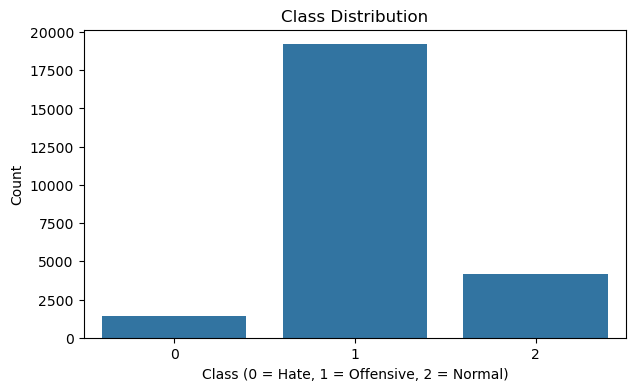


Model Evaluation:
Accuracy: 0.8930804922332055

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.16      0.23       290
           1       0.91      0.96      0.94      3832
           2       0.84      0.83      0.84       835

    accuracy                           0.89      4957
   macro avg       0.74      0.65      0.67      4957
weighted avg       0.88      0.89      0.88      4957



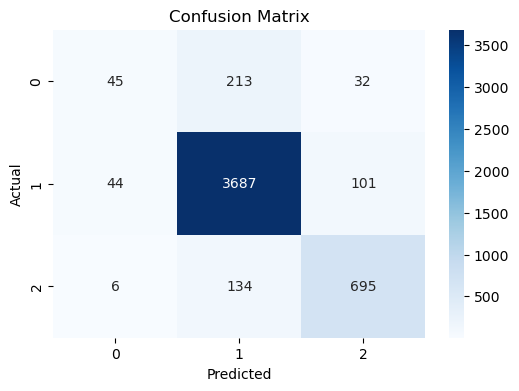

In [19]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Load Dataset
df = pd.read_csv(r"C:\Users\user\Downloads\project 4\hate-speech-and-offensive-language.csv")

print("Dataset Loaded Successfully!")
print(df.head())

# ==============================
# Step 2: Data Visualization
# ==============================

plt.figure(figsize=(7, 4))
sns.countplot(x=df["class"])
plt.title("Class Distribution")
plt.xlabel("Class (0 = Hate, 1 = Offensive, 2 = Normal)")
plt.ylabel("Count")
plt.show()

# ==============================
# Step 3: Feature Selection
# ==============================

X = df['tweet']      # Text column
y = df['class']      # Target column

# Step 4: Label Encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 6: TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Step 7: Train Model (Logistic Regression)
model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)

# Step 8: Make Predictions
y_pred = model.predict(X_test_tfidf)

# ==============================
# Step 9: Evaluation
# ==============================

print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
target_names = [str(c) for c in label_encoder.classes_]
print(classification_report(y_test, y_pred, target_names=target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
